**Deep Learning - Redes Convolucionais**

## **Objetivos**

* Conhecer e praticar Redes Neurais Convolucionais
* Conhecer uma intuição sobre Convolução, Pooling
* Praticar a classificação de objeto usando Keras/TensorFlow

## **Definição do Problema**

Desenvolver um **Modelo de Rede Neural Artificial do tipo Multilayer**, capaz de classificar os algarismos escritos a mão com base nas suas características. Para isso vamos usar o dataset MNIST (https://www.kaggle.com/datasets/hojjatk/mnist-dataset).

Esse dataset contém 70.000 algarismos, separadas em dez classes diferentes indo de 0 a 9.

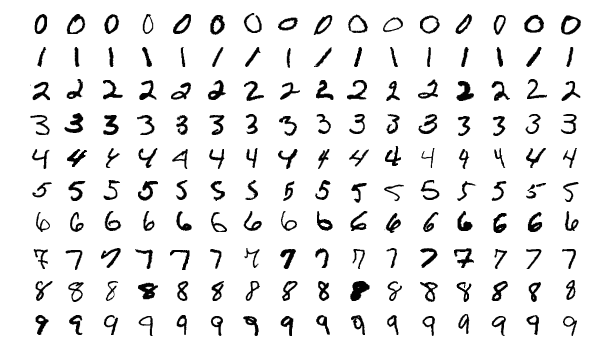

# **CNN - Redes Neurais Convulocionais**

### **1** - Carregando as Bibliotecas

In [1]:
#Importar as bibliotecas
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

### **2** - Carregando o Dataset

In [2]:
#Importando o dataset
from keras.datasets import mnist

#Carregar o conjunto de dados
(imagem_treino, classe_treino), (imagem_teste, classe_teste) = mnist.load_data()

# Mostra as caracteristicas do dataset
print(imagem_treino.shape)
print(np.unique(classe_treino))

print(imagem_teste.shape)
print(np.unique(classe_teste))

(60000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]
(10000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


As imagens de treino possuem 50 mil imagens, sendo 32 x 32 Pixels, 3 canais de cor (RGB)

As classes de treino vão de 0 a 9, totalizando 10 Classes.

0


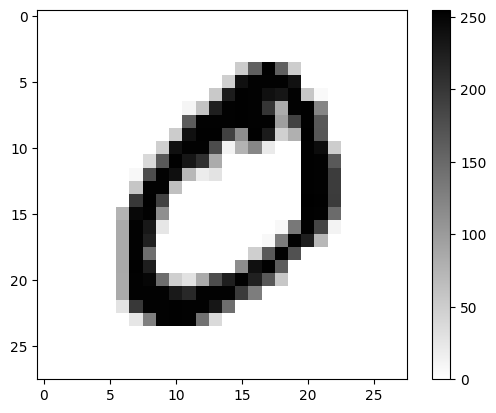

In [3]:
#Exibe uma amostra do dataset
plt.figure()
plt.imshow(imagem_treino[1], cmap = 'binary')
plt.colorbar()
print(classe_treino[1])

### **3 - Processando os dados**

Vamos normalizar o range de cores. O RGB assume valores de 0 a 255. Vamos Normaliza-lo para ficar entre 0 e 1. Para isso, podemos dividr as imagens por 255

In [4]:
#Normalizando a escala para ficar entre 0 e 1
imagem_treino = imagem_treino/255
imagem_teste = imagem_teste/255

0


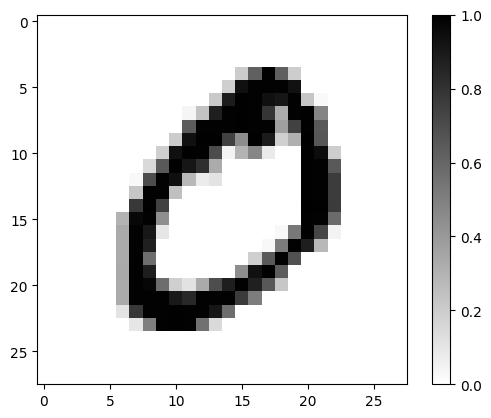

In [5]:
plt.figure()
plt.imshow(imagem_treino[1], cmap = 'binary')
plt.colorbar()
print(classe_treino[1])

### **4 - Criando o Modelo**

In [7]:
#Criando um modelo de rede neural sequencial.
model2 = keras.Sequential()

#Adiciona uma camada de convolução 2D com 32 filtros de tamanho 5x5, que usa a função de ativação ReLU
#e tem uma entrada de imagem 2D com altura e largura de 28 pixels e 1 canal de cor - Escala de cinza
model2.add( keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                                activation ='relu', input_shape=(28,28,1)) )

#Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
#(em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
#A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
#de parâmetros e a extrair as características mais importantes da imagem.
model2.add( keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

#Transforma a imagem no formato de "matriz" em um vetor
model2.add(keras.layers.Flatten())

#Adiciona uma camada de 128 neuronios totalmente conectados (Densa) com função de ativação ReLU
model2.add(keras.layers.Dense(128, activation='relu'))

#Adiciona uma camada de 10 neurônios totalmente conectados (Densa), que calcula
#as probabilidades de cada classe usando a função softmax.
model2.add(keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **5 - Compilando o Modelo**

In [8]:
#Compila o modelo model2 com o otimizador Adam, a função de perda de entropia cruzada categórica esparsa
#e a métrica de acurácia. O modelo agora está pronto para ser treinado.
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Vamos mostrar como ficou a rede
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 805,066 (3.07 MB)

 Trainable params: 805,066 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

### **6 - Treinando o Modelo**

In [9]:
#Treinando nosso modelo!
epochs_hist = model2.fit(imagem_treino, classe_treino, epochs = 7)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9230 - loss: 0.2571
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9854 - loss: 0.0459
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9908 - loss: 0.0293
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9941 - loss: 0.0179
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9958 - loss: 0.0127
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9965 - loss: 0.0107
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9972 - loss: 0.0084


Vamos plotar um gráfico da Loss e da Acuracy

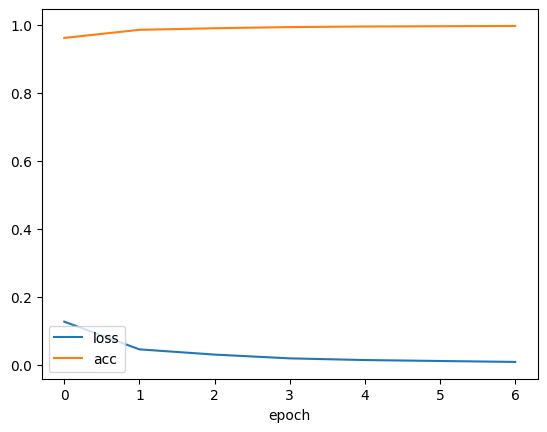

In [10]:
history_df = pd.DataFrame(epochs_hist.history)

plt.plot(history_df['loss'])
plt.plot(history_df['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss','acc'], loc='lower left')
plt.show()

### **7 - Testando o Modelo**

In [11]:
#Testando o Modelo com test
test_loss, test_acc = model2.evaluate(imagem_teste, classe_teste)

print(test_loss)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9821 - loss: 0.0643
0.047027360647916794
0.9866999983787537


Por que obtivemos as Loss e Acuracia acima?

### **8 - Colocando o Modelo a Prova**

In [12]:
#Funções para facilitar a visualização
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if(predicted_label == true_label):
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                       100*np.max(predictions_array),
                                       true_label,
                                       color = color))

def plot_value_array(i, predictions_array, true_label):
   predictions_array, true_label = predictions_array[i], true_label[i].item()
   plt.grid(False)
   plt.xticks(range(10),range(10))
   plt.yticks([])
   thisplot = plt.bar(range(10), predictions_array, color = "#77777777")
   plt.ylim([0,1])
   predicted_label = np.argmax(predictions_array)

   thisplot[predicted_label].set_color('red')
   thisplot[true_label].set_color('blue')

In [13]:
predictions = model2.predict(imagem_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [14]:
for i in range(1000):
  if(np.argmax(predictions[i]) != classe_teste[i]):
    print(i)

18
62
96
151
321
340
445
448
479
582
619
674
720
738
740
813
924
947
965


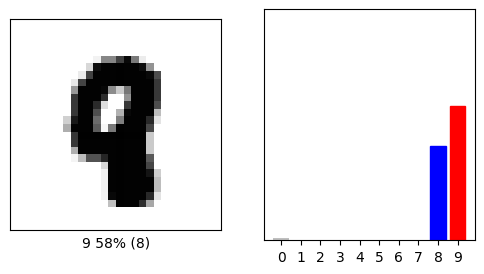

In [15]:
#Agora vamos avaliar as imagens que ele errou
i = 947 # Substitua por um indice
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, classe_teste, imagem_teste[:,:,:])
plt.subplot(1,2,2)
plot_value_array(i, predictions, classe_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


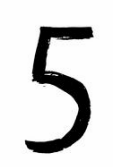

A classe predita para a imagem é: 5


In [42]:
#Salvando o modelo treinado
model2.save("modelo_treinado.h5")

#Carregando o modelo treinado
modelo_carregado = keras.models.load_model("modelo_treinado.h5")

#Importar as bibliotecas
from keras.preprocessing import image
from IPython.display import display, Image
import cv2


caminho_da_imagem = '5.png'
img = image.load_img(caminho_da_imagem, target_size=(28, 28))
img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)  #inverte preto/branco
img = cv2.resize(img, (28, 28))
img_array = image.img_to_array(img)
img_array = img_array.reshape((1, 28, 28, 1))

#Normalizando a escala para ficar entre 0 e 1
img_array = img_array / 255.0

#Avaliando a imagem usando o modelo carregado
predicao = modelo_carregado.predict(img_array)

#Obtendo a classe predita
classe_predita = np.argmax(predicao)

#Exibindo a imagem
display(Image(filename=caminho_da_imagem))

#Exibindo o resultado
print(f"A classe predita para a imagem é: {classe_predita}")